# HW1  
## Arman Esmaeili — 401130133  
## Nima Rezaee - 401130373
### Hamedan University of Technology  
#### 11 Nov 2025  

In this exercise, we explore fundamental concepts of image processing.

First, we examine different types of images, color models, conversions between color spaces, and techniques for adjusting and analyzing image contrast and histograms.  
Next, we study various kernels and filters commonly used in image processing tasks.  
Finally, we work with basic video processing operations to gain a practical understanding of essential video-related concepts.

---

در این تمرین، هدف آشنایی مقدماتی با مفاهیم پایه‌ای پردازش تصویر است.  
در بخش نخست، با انواع تصاویر و مدل‌های رنگی آن‌ها، نحوه‌ی تبدیل تصاویر میان مدل‌های مختلف و همچنین تنظیم و تحلیل کنتراست و هیستوگرام تصاویر آشنا می‌شویم.  
در بخش دوم، به بررسی انواع کرنل‌ها و فیلترهای مورد استفاده در پردازش تصویر پرداخته خواهد شد.  
در بخش پایانی نیز با پردازش ویدیو کار خواهیم کرد تا با مفاهیم و روش‌های اولیه‌ی آن نیز آشنایی پیدا کنیم.

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# 1. Data type & channels

In [35]:
import cv2
import numpy as np

image_path = '/kaggle/input/pic-and-video/pic.jpg'  
img = cv2.imread(image_path)  

print("Img type:", img.dtype)
print("Img dimensions (Height, Width, Channels):", img.shape)  
print("Channels:", img.shape[2] if len(img.shape) == 3 else 1)

Img type: uint8
Img dimensions (Height, Width, Channels): (4000, 2250, 3)
Channels: 3


# 2. RGB, Grayscale, Binary 

In this section, the original image is loaded from the input directory and displayed in the RGB color model.
OpenCV reads images in the BGR format by default, so the image is converted to RGB using cv2.cvtColor() for accurate color representation when visualized with Matplotlib.
The imshow() function displays the image without axes, ensuring a clear and realistic visualization of the loaded content.

---

<div dir="rtl">

در این بخش، تصویر اصلی از مسیر ورودی بارگذاری شده و در مدل رنگی **RGB** نمایش داده می‌شود.  
کتابخانه‌ی OpenCV به‌صورت پیش‌فرض تصاویر را در قالب **BGR** می‌خواند، بنابراین با استفاده از تابع `cv2.cvtColor()` تصویر به مدل **RGB** تبدیل می‌شود تا هنگام نمایش با Matplotlib رنگ‌ها به‌درستی نشان داده شوند.  
تابع `imshow()` تصویر را بدون نمایش محور‌ها ترسیم می‌کند تا محتوای بصری تصویر به‌صورت واضح و واقعی نمایش یابد.

</div>


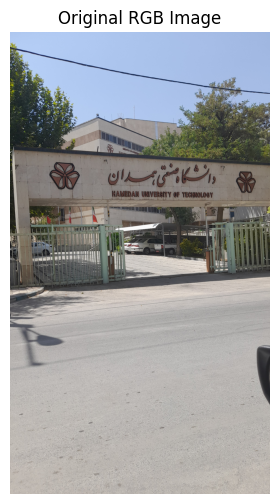

In [36]:
    original_image = cv2.imread("/kaggle/input/pic-and-video/pic.jpg")
    if original_image is None:
        print(f"Error: Could not load image.")
    
    original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)    
    
    fig, ax1 = plt.subplots(figsize=(8, 6))  
    ax1.imshow(original_rgb)
    ax1.set_title('Original RGB Image')
    ax1.axis('off')
    plt.show()  

In this section, the original RGB image is converted into a grayscale image, and then the grayscale output is transformed into a binary image.
The grayscale conversion reduces the three color channels (Red, Green, Blue) into a single intensity channel, where each pixel value represents the brightness level ranging from black to white.

---

در این بخش، تصویر RGB اصلی به یک تصویر خاکستری تبدیل می‌شود و سپس خروجی خاکستری به تصویر دودویی تغییر می‌یابد.
تبدیل به تصویر خاکستری سه کانال رنگی (قرمز، سبز، آبی) را به یک کانال شدت روشنایی تبدیل می‌کند که مقدار هر پیکسل میزان روشنایی آن را از سیاه تا سفید نشان می‌دهد.

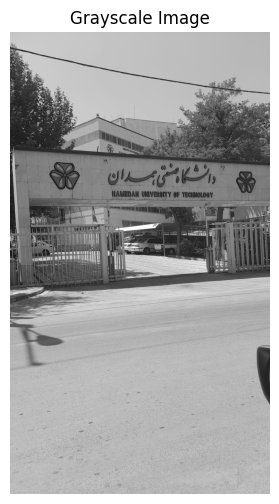

In [37]:
gray_image = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2GRAY)

fig, ax2 = plt.subplots(figsize=(8, 6))  
ax2.imshow(gray_image, cmap='gray')
ax2.set_title('Grayscale Image')
ax2.axis('off')
plt.show()

In this step, the grayscale image is converted into a binary (black and white) image using the cv2.threshold() function with Otsu’s thresholding method.
This approach automatically determines the optimal threshold value that separates the image into two distinct classes, foreground (white) and background (black).
Pixels with intensity values above the threshold are set to 255 (white), and those below it are set to 0 (black).
The resulting binary image simplifies the data for tasks such as object detection, segmentation, and edge analysis.

---

<div dir="rtl">

در این مرحله، تصویر خاکستری به یک تصویر دودویی (سیاه و سفید) تبدیل می‌شود.
برای این کار از تابع cv2.threshold() همراه با روش آستانه‌گذاری اتسو (Otsu) استفاده شده است.
در این روش، مقدار آستانه به‌صورت خودکار تعیین می‌شود تا تصویر به دو بخش متمایز تقسیم شود: ناحیه‌ی پیش‌زمینه (سفید) و پس‌زمینه (سیاه).
پیکسل‌هایی که مقدار شدت روشنایی آن‌ها بیشتر از آستانه باشد برابر با 255 (سفید) و مقادیر کمتر از آستانه برابر با 0 (سیاه) در نظر گرفته می‌شوند.
تصویر دودویی حاصل، داده را ساده‌تر کرده و برای کارهایی مانند تشخیص اشیاء، بخش‌بندی و تحلیل لبه‌ها بسیار مفید است.

</div>

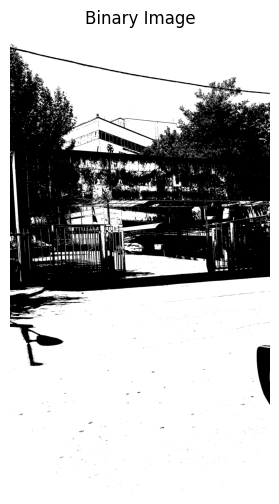

In [38]:
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, ax3 = plt.subplots(figsize=(8, 6))  
ax3.imshow(binary_image, cmap='gray')
ax3.set_title('Binary Image')
ax3.axis('off')
plt.show()

# 3. HSV

## HSV Color Model Conversion Report

In this step, the RGB image is converted into the HSV (Hue, Saturation, Value) color model using the cv2.cvtColor() function.
The HSV model separates color information (hue) from intensity (value), making it more intuitive for tasks such as color detection and filtering.

- Hue (H): Represents the color type (e.g., red, green, blue) on a circular scale.

- Saturation (S): Indicates the purity or intensity of the color.

- Value (V): Corresponds to the brightness or lightness of the color.

This color space is particularly useful in image analysis and computer vision because it aligns more closely with human color perception than the RGB model.

---

<div dir="rtl">

در این مرحله، تصویر RGB به مدل رنگی HSV (Hue, Saturation, Value) تبدیل می‌شود.
برای این کار از تابع cv2.cvtColor() استفاده شده است.
مدل رنگی HSV، اطلاعات رنگ (Hue) را از شدت روشنایی (Value) جدا می‌کند و در بسیاری از کاربردهای بینایی ماشین مانند تشخیص رنگ و فیلترگذاری مناسب‌تر از مدل RGB است.

Hue: نوع رنگ را نشان می‌دهد (مثل قرمز، سبز، آبی) که به‌صورت دایره‌ای تعریف شده است.

Saturation: خلوص یا شدت رنگ را مشخص می‌کند.

Value: میزان نور یا درخشندگی رنگ را تعیین می‌کند.

این فضا نسبت به RGB به نحوه‌ی درک رنگ‌ها توسط انسان نزدیک‌تر است و در تحلیل و پردازش تصویر کاربرد گسترده‌ای دارد.

</div>

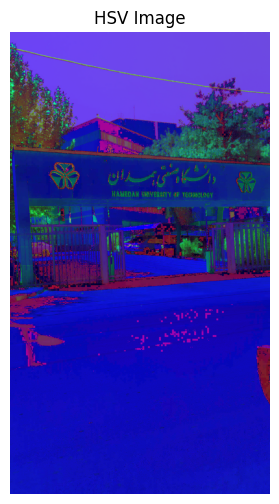

In [39]:
hsv_image = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2HSV)

fig, ax4 = plt.subplots(figsize=(8, 6))  
ax4.imshow(hsv_image)
ax4.set_title('HSV Image')
ax4.axis('off')
plt.show()

# 4. Divide RGB and HSV into its elements

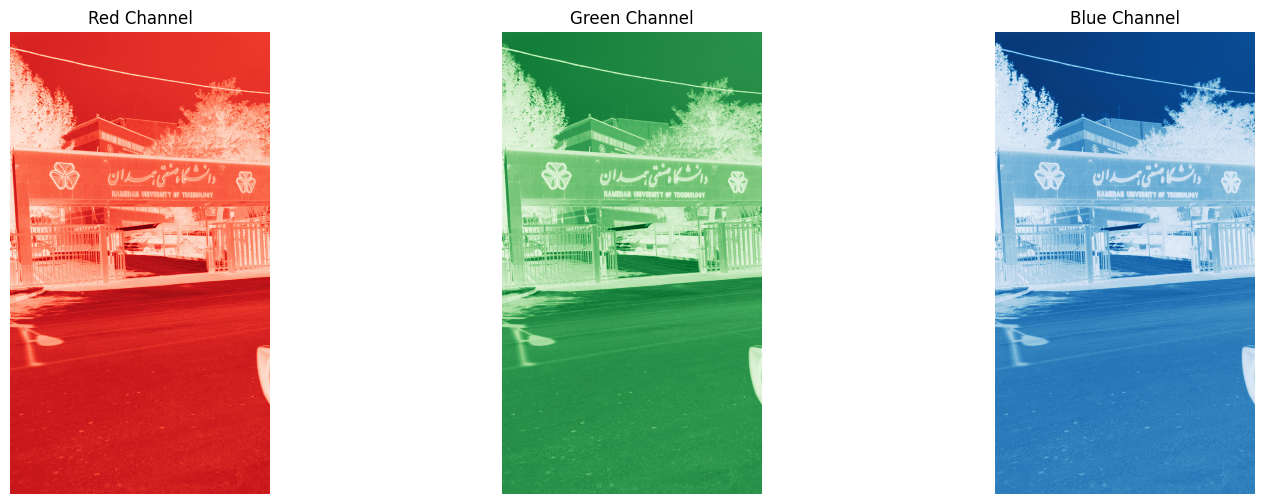

In [40]:
r_channel = original_rgb[:, :, 0]
g_channel = original_rgb[:, :, 1]
b_channel = original_rgb[:, :, 2]

fig, axs5 = plt.subplots(1, 3, figsize=(18, 6)) 

axs5[0].imshow(r_channel, cmap='Reds')
axs5[0].set_title('Red Channel')
axs5[0].axis('off')

axs5[1].imshow(g_channel, cmap='Greens')
axs5[1].set_title('Green Channel')
axs5[1].axis('off')

axs5[2].imshow(b_channel, cmap='Blues')
axs5[2].set_title('Blue Channel')
axs5[2].axis('off')

plt.show()

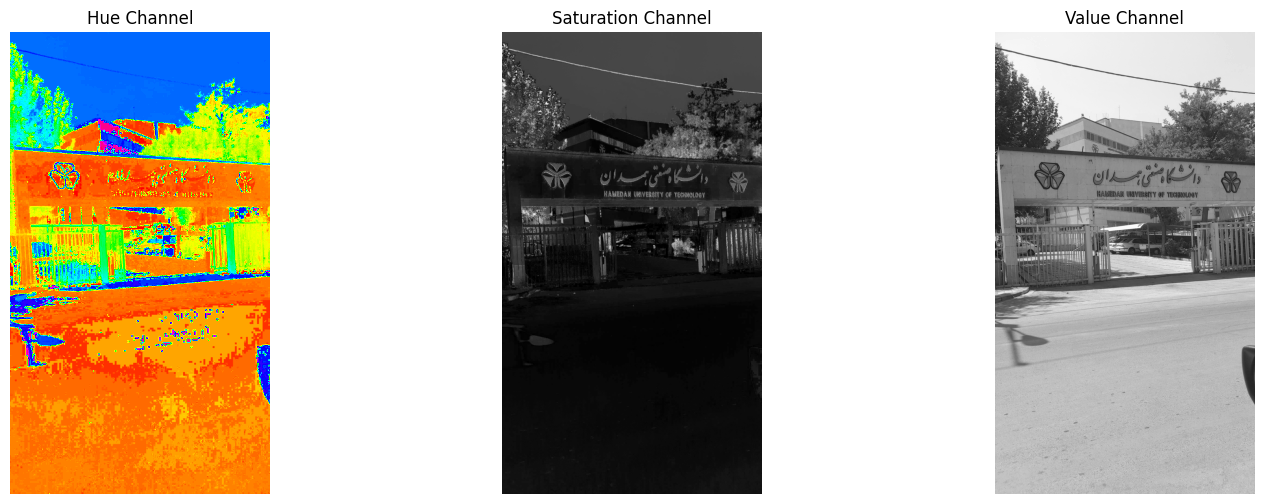

In [41]:
h_channel = hsv_image[:, :, 0]  
s_channel = hsv_image[:, :, 1]  
v_channel = hsv_image[:, :, 2]  

fig, axs5 = plt.subplots(1, 3, figsize=(18, 6))

axs5[0].imshow(h_channel / 180.0, cmap='hsv')
axs5[0].set_title('Hue Channel')
axs5[0].axis('off')

axs5[1].imshow(s_channel, cmap='gray')
axs5[1].set_title('Saturation Channel')
axs5[1].axis('off')

axs5[2].imshow(v_channel, cmap='gray')
axs5[2].set_title('Value Channel')
axs5[2].axis('off')

plt.show()

# 5. Contrast of a Picture

## Contrast Adjustment Report

Contrast defines the difference in brightness or intensity between the lightest and darkest areas of an image.
A high-contrast image emphasizes the separation between bright and dark regions, making edges and details more visible.
A low-contrast image, on the other hand, appears faded or flat, as the range of intensity values is compressed.

In this section, contrast is adjusted using the function cv2.convertScaleAbs().
This function modifies pixel values according to the formula:

output=α×input+β

Where:

- α (alpha) controls the contrast, values greater than 1 increase contrast, while values between 0 and 1 decrease it.

- β (beta) controls the brightness, adding a constant value to all pixels.

Two versions are created:

- High Contrast (α = 2.0): Enhances the intensity difference, making edges sharper and details more defined.

- Low Contrast (α = 0.5): Reduces intensity variation, resulting in a softer and flatter appearance.

---

<div dir="rtl">

کنتراست به تفاوت بین نواحی روشن و تیره‌ی یک تصویر اشاره دارد.
تصویر با کنتراست بالا تفاوت زیادی بین بخش‌های روشن و تیره دارد و جزئیات و لبه‌ها در آن واضح‌تر دیده می‌شوند.
در مقابل، تصویر با کنتراست پایین حالتی تخت یا کم‌رنگ دارد، زیرا دامنه‌ی مقادیر روشنایی در آن محدودتر است.

در این بخش، تنظیم کنتراست با استفاده از تابع cv2.convertScaleAbs() انجام می‌شود.
این تابع مقادیر پیکسل‌ها را طبق رابطه‌ی زیر تغییر می‌دهد:

خروجی=α×ورودی+β

که در آن:

α (آلفا) کنترل‌کننده‌ی کنتراست است، اگر مقدار آن بزرگ‌تر از ۱ باشد، کنتراست افزایش می‌یابد و اگر بین ۰ تا ۱ باشد، کنتراست کاهش پیدا می‌کند.

β (بتا) میزان روشنایی تصویر را تنظیم می‌کند، با افزودن مقدار ثابت به همه‌ی پیکسل‌ها.

در این مثال دو تصویر تولید شده است:

کنتراست بالا (α = 2.0): تفاوت بین نواحی روشن و تیره را بیشتر کرده و جزئیات تصویر را واضح‌تر می‌کند.

کنتراست پایین (α = 0.5): باعث کاهش تفاوت روشنایی‌ها شده و تصویر را نرم‌تر و تخت‌تر نشان می‌دهد.

</div>

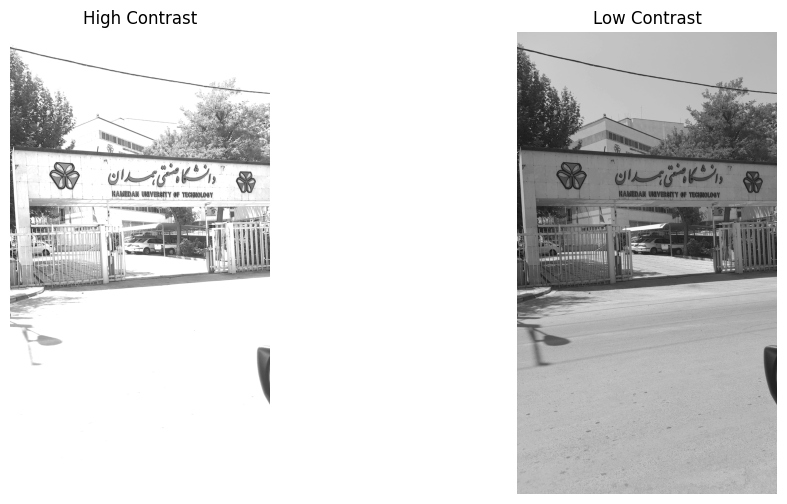

In [42]:
def adjust_contrast(image, alpha=1.5, beta=0):
        """
        Adjust contrast and brightness
        alpha: contrast control (1.0-3.0)
        beta: brightness control (0-100)
        """
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    
high_contrast = adjust_contrast(gray_image, alpha=2.0, beta=0)

low_contrast = adjust_contrast(gray_image, alpha=0.5, beta=0)

fig, axs7 = plt.subplots(1, 2, figsize=(12, 6))

axs7[0].imshow(high_contrast, cmap='gray')
axs7[0].set_title('High Contrast')
axs7[0].axis('off')

axs7[1].imshow(low_contrast, cmap='gray')
axs7[1].set_title('Low Contrast')
axs7[1].axis('off')

plt.show()

## Contrast Value Calculation

To measure the level of contrast quantitatively, we calculate the standard deviation of pixel intensity values in each image.
A higher standard deviation means greater variation in brightness — hence, higher contrast.
Using NumPy’s np.std() function:
``` python
high_contrast_value = np.std(high_contrast)
low_contrast_value = np.std(low_contrast)

print("High Contrast Value:", high_contrast_value)
print("Low Contrast Value:", low_contrast_value)

```
In our exercise, the computed results are approximately:

High Contrast Value: 56.3

Low Contrast Value: 26.1

This confirms that increasing the alpha factor effectively enhances the overall intensity range and visual separation between dark and bright areas.

--- 

<div dir="rtl">

برای اندازه‌گیری مقدار عددی کنتراست، از انحراف معیار شدت روشنایی پیکسل‌ها در تصویر استفاده می‌شود.
هر چه مقدار انحراف معیار بزرگ‌تر باشد، تغییرات روشنایی بیشتر و در نتیجه کنتراست تصویر بالاتر است.
برای محاسبه از تابع np.std() در کتابخانه‌ی NumPy استفاده می‌کنیم:
در این تمرین، مقادیر به‌دست‌آمده تقریباً به شکل زیر هستند:

کنتراست بالا: 56.3

کنتراست پایین: 26.1

این نتایج نشان می‌دهند که افزایش پارامتر alpha باعث افزایش دامنه‌ی شدت روشنایی‌ها و تفکیک بهتر نواحی روشن و تیره در تصویر شده است.

</div>

In [43]:
high_contrast_value = np.std(high_contrast)
low_contrast_value = np.std(low_contrast)

print("High Contrast Value:", high_contrast_value)
print("Low Contrast Value:", low_contrast_value)

High Contrast Value: 56.35922626744306
Low Contrast Value: 26.16016958947629


# 6. Draw histogram of picture

## Histogram Analysis Report

Histograms visualize the distribution of pixel intensities in an image, helping analyze brightness, contrast, and color information.

RGB Histogram
- Calculated separately for Red, Green, and Blue channels.
- Shows how frequently each intensity (0–255) occurs in the image for each color channel.
- Peaks indicate dominant color intensities, while flat areas indicate less frequent values.

Grayscale Histogram
- Single-channel intensity histogram of the grayscale image.
- Provides a clear view of overall brightness distribution and contrast.
- Useful to identify whether the image is predominantly dark, bright, or balanced.

HSV Histogram
- Calculated separately for Hue, Saturation, and Value channels.
- Hue shows the color type distribution, Saturation indicates color purity, and Value represents brightness.
- This histogram helps understand color characteristics more intuitively than RGB.

Binary Histogram
- Binary image contains only 0 (black) and 255 (white).
- Histogram shows two spikes corresponding to these values, confirming correct thresholding.
- Useful for validating foreground-background separation.

---

<div dir="rtl">
هیستوگرام‌ها توزیع شدت پیکسل‌ها را در تصویر نمایش می‌دهند و برای تحلیل روشنایی، کنتراست و اطلاعات رنگی کاربرد دارند.

هیستوگرام RGB

به‌صورت جداگانه برای کانال‌های قرمز، سبز و آبی محاسبه می‌شود- 
نشان می‌دهد هر مقدار شدت (۰–۲۵۵) در هر کانال چقدر تکرار شده است.
قله‌ها بیانگر شدت غالب رنگ‌ها و قسمت‌های صاف نشان‌دهنده‌ی مقادیر کمتر رایج هستند.

هیستوگرام خاکستری

هیستوگرام تک‌کاناله تصویر خاکستری است.
نمای روشنی از توزیع روشنایی و کنتراست تصویر ارائه می‌دهد.
مفید برای شناسایی اینکه تصویر عمدتاً تاریک، روشن یا متعادل است.

هیستوگرام HSV

برای هر سه کانالHue، Saturation و Value محاسبه می‌شود.
Hue توزیع نوع رنگ، Saturation شدت رنگ و Value روشنایی تصویر را نشان می‌دهد.
این هیستوگرام درک بهتری از ویژگی‌های رنگی تصویر نسبت به RGB فراهم می‌کند.

هیستوگرام دودویی

تصویر دودویی فقط شامل ۰ (سیاه) و ۲۵۵ (سفید) است.
هیستوگرام دو قله مربوط به این دو مقدار را نشان می‌دهد و صحت آستانه‌گذاری را تأیید می‌کند.
مفید برای بررسی تفکیک صحیح پس‌زمینه و پیش‌زمینه.

</div>

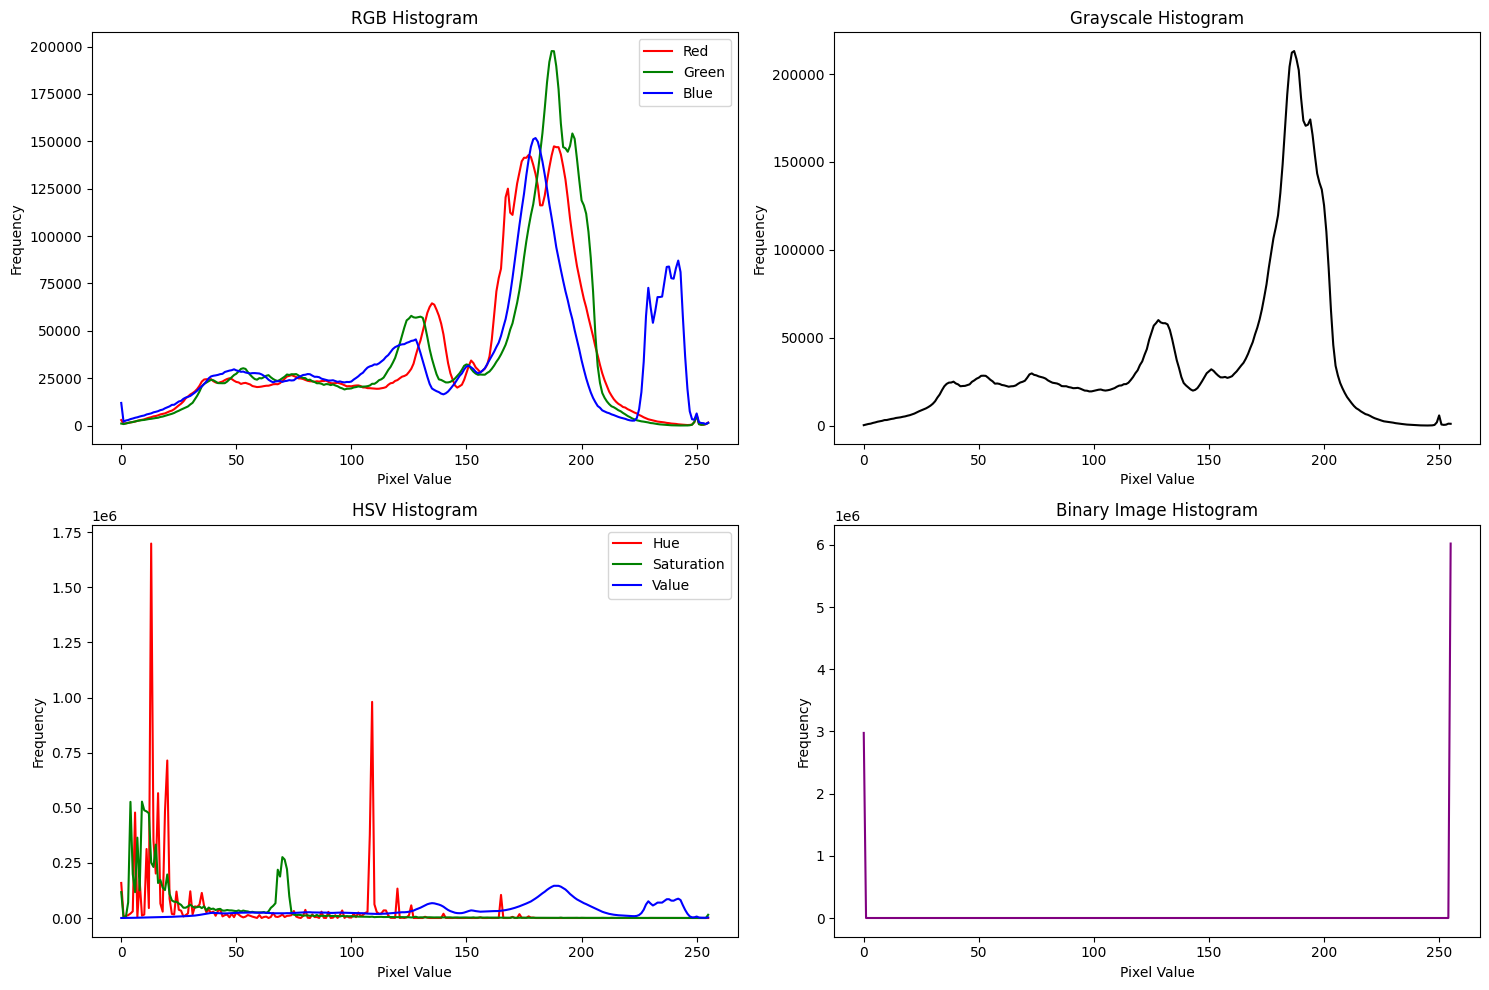

In [44]:
fig, axes6 = plt.subplots(2, 2, figsize=(15, 10))

# RGB histogram
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([original_rgb], [i], None, [256], [0, 256])
    axes6[0, 0].plot(hist, color=color)
axes6[0, 0].set_title('RGB Histogram')
axes6[0, 0].set_xlabel('Pixel Value')
axes6[0, 0].set_ylabel('Frequency')
axes6[0, 0].legend(['Red', 'Green', 'Blue'])

# Grayscale histogram
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
axes6[0, 1].plot(hist_gray, color='black')
axes6[0, 1].set_title('Grayscale Histogram')
axes6[0, 1].set_xlabel('Pixel Value')
axes6[0, 1].set_ylabel('Frequency')

# HSV histogram
hsv_colors = ('r', 'g', 'b')
hsv_labels = ['Hue', 'Saturation', 'Value']
for i in range(3):
    hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
    axes6[1, 0].plot(hist, color=hsv_colors[i])
axes6[1, 0].set_title('HSV Histogram')
axes6[1, 0].set_xlabel('Pixel Value')
axes6[1, 0].set_ylabel('Frequency')
axes6[1, 0].legend(hsv_labels)

# Binary histogram
hist_binary = cv2.calcHist([binary_image], [0], None, [256], [0, 256])
axes6[1, 1].plot(hist_binary, color='purple')
axes6[1, 1].set_title('Binary Image Histogram')
axes6[1, 1].set_xlabel('Pixel Value')
axes6[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()    

# 7. Histogram Equalization & Stretching

## Histogram Equalization Report

Histogram equalization is a technique used to enhance image contrast by redistributing pixel intensity values to span the full range (0–255).
This improves visibility in images that are too dark or too bright.

Grayscale Equalization
- Applied directly on the single-channel grayscale image using cv2.equalizeHist().
- This spreads pixel values more evenly, enhancing details in both dark and bright regions.
- The result is a clearer and more visually balanced grayscale image.

Color Equalization
- For color images, direct equalization on RGB channels can distort colors.
- Instead, the image is converted to YCrCb color space:
    - Y channel represents luminance (brightness).
    - Cr and Cb channels represent chrominance (color information).
- Histogram equalization is applied only on the Y channel to enhance brightness without affecting color balance.
- The image is then converted back to RGB for display.
```python
equalized_gray = cv2.equalizeHist(gray_image)

ycrcb = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2YCrCb)
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
equalized_color = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)
```
---

<div dir="rtl">
هم‌ترازی هیستوگرام (Histogram Equalization) تکنیکی برای بهبود کنتراست تصویر است که مقادیر شدت پیکسل‌ها را دوباره توزیع می‌کند تا کل بازه‌ی ممکن (۰ تا ۲۵۵) را پوشش دهد.
این روش جزئیات را در تصاویر تاریک یا روشن بهبود می‌دهد و دید بصری تصویر را افزایش می‌دهد.

    هم‌ترازی تصویر خاکستری
<ul> <li>به‌صورت مستقیم روی تصویر تک‌کاناله خاکستری با تابع <code>cv2.equalizeHist()</code> انجام می‌شود.</li> <li>پیکسل‌ها به‌طور یکنواخت‌تر توزیع شده و جزئیات نواحی روشن و تاریک بهتر دیده می‌شوند.</li> <li>نتیجه تصویری واضح‌تر و متعادل‌تر از نظر روشنایی است.</li> </ul>
    
    هم‌ترازی تصویر رنگی
<ul> <li>اعمال مستقیم هم‌ترازی روی کانال‌های RGB می‌تواند رنگ‌ها را تغییر دهد.</li> <li>برای جلوگیری از این مشکل، تصویر ابتدا به فضای رنگی <b>YCrCb</b> تبدیل می‌شود: <ul> <li><b>کانال Y:</b> روشنایی تصویر را نشان می‌دهد.</li> <li><b>کانال‌های Cr و Cb:</b> اطلاعات رنگی را نگهداری می‌کنند.</li> </ul> </li> <li>هم‌ترازی هیستوگرام فقط روی <b>کانال Y</b> اعمال می‌شود تا روشنایی بهبود یابد بدون اینکه تعادل رنگ‌ها تغییر کند.</li> <li>سپس تصویر دوباره به RGB تبدیل شده و نمایش داده می‌شود.</li> </ul> </div>

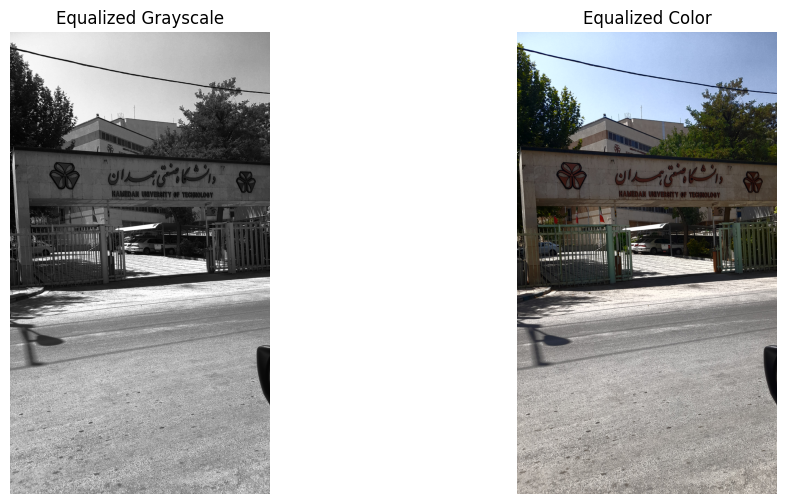

In [45]:
equalized_gray = cv2.equalizeHist(gray_image)

ycrcb = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2YCrCb)
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
equalized_color = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

fig, axs8 = plt.subplots(1, 2, figsize=(12, 6))

axs8[0].imshow(equalized_gray, cmap='gray')
axs8[0].set_title('Equalized Grayscale')
axs8[0].axis('off')

axs8[1].imshow(equalized_color)
axs8[1].set_title('Equalized Color')
axs8[1].axis('off')

plt.show()

## Histogram Widening (Contrast Stretching) Report

Histogram widening, also known as contrast stretching, is a technique to enhance the contrast of an image by expanding the range of pixel intensity values to the full 0–255 range.
This makes details in dark or bright regions more distinguishable.

Grayscale Images
- For a grayscale image, the minimum and maximum intensity values are found.
- Pixel values are then rescaled linearly so that the minimum maps to 0 and the maximum maps to 255.
- This spreads the intensities across the full range, improving visual contrast.

Color Images
- For color images, the process is applied independently to each RGB channel.
- Each channel’s minimum and maximum values are stretched to the 0–255 range.
- This enhances contrast without altering the relative proportions of the colors.

---

<div dir="rtl">
گزارش کشش هیستوگرام (Widen Histogram / Contrast Stretching)

کشش هیستوگرام یا Contrast Stretching تکنیکی برای بهبود کنتراست تصویر است که مقادیر شدت پیکسل‌ها را به بازه‌ی کامل ۰ تا ۲۵۵ گسترش می‌دهد.
این روش باعث می‌شود جزئیات نواحی تاریک یا روشن بهتر دیده شوند.

    تصاویر خاکستری
<ul> <li>برای تصویر خاکستری، مقادیر **حداقل و حداکثر شدت پیکسل‌ها** تعیین می‌شوند.</li> <li>سپس مقادیر پیکسل‌ها به صورت خطی بازنگری می‌شوند تا حداقل به ۰ و حداکثر به ۲۵۵ برسد.</li> <li>این کار باعث گسترش طیف شدت روشنایی و بهبود کنتراست بصری می‌شود.</li> </ul>

    تصاویر رنگی
<ul> <li>برای تصاویر رنگی، این فرآیند **به‌صورت جداگانه برای هر کانال RGB** اعمال می‌شود.</li> <li>مقادیر حداقل و حداکثر هر کانال به بازه‌ی ۰–۲۵۵ کشیده می‌شوند.</li> <li>این کار کنتراست تصویر را افزایش می‌دهد بدون اینکه نسبت رنگ‌ها تغییر کند.</li> </ul> </div>

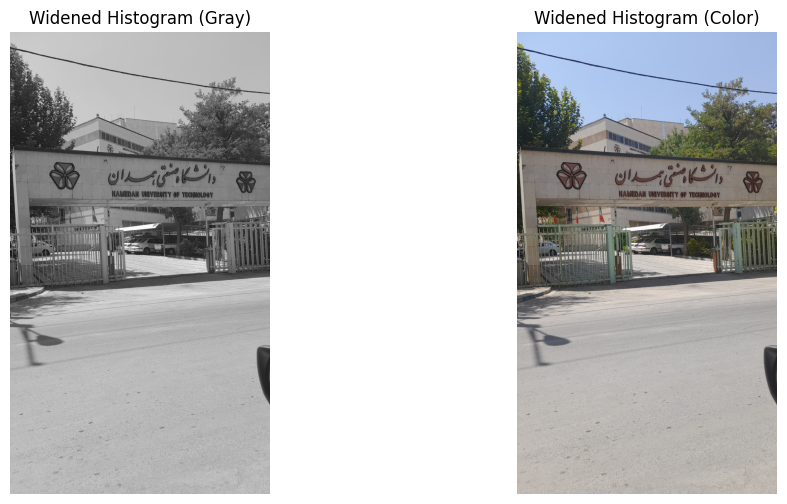

In [46]:
def widen_histogram(image):
    if len(image.shape) == 2:
        min_val = np.min(image)
        max_val = np.max(image)
        stretched = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    else:
        stretched = np.zeros_like(image)
        for i in range(3):
            min_val = np.min(image[:, :, i])
            max_val = np.max(image[:, :, i])
            stretched[:, :, i] = ((image[:, :, i] - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

widened_gray = widen_histogram(gray_image)
widened_color = widen_histogram(original_rgb)


fig, axs9 = plt.subplots(1, 2, figsize=(12, 6))

axs9[0].imshow(widened_gray, cmap='gray')
axs9[0].set_title('Widened Histogram (Gray)')
axs9[0].axis('off')

axs9[1].imshow(widened_color)
axs9[1].set_title('Widened Histogram (Color)')
axs9[1].axis('off')

plt.show()

# 2.2 Salt & Pepper Noise Injection 

Salt-and-pepper noise is a type of impulse noise where random pixels are set to either maximum (255) or minimum (0) intensity.
This simulates real-world noise such as faulty sensors or transmission errors.

How It Works
- A random salt mask is created where a fraction of pixels is set to 255 (white).
- A random pepper mask is created where a fraction of pixels is set to 0 (black).
- The probability of salt (salt_prob) and pepper (pepper_prob) determines how noisy the image becomes.
- The operation works for both grayscale and color images.

Gaussian Filter (Smoothing)

# Explanatoin of Gaussian Filter

A Gaussian filter is a widely used image processing filter for smoothing or blurring images.
It works by convolving the image with a Gaussian kernel, which gives higher weight to pixels near the center of the kernel and lower weight to distant pixels.
- Reduces image noise and fine details.
- Helps in preprocessing before edge detection, segmentation, or other analysis tasks.

---

<div dir="rtl">
گزارش افزودن نویز نمک و فلفل

نویز نمک و فلفل (Salt-and-Pepper Noise) نوعی نویز ضربه‌ای است که در آن پیکسل‌های تصادفی یا به مقدار حداکثر (۲۵۵) یا حداقل (۰) تنظیم می‌شوند.
این نویز شبیه مشکلات واقعی مانند خطاهای سنسور یا اختلال در انتقال تصویر است.

نحوه‌ی عملکرد
<ul> <li>یک **ماسک نمک (Salt Mask)** ایجاد می‌شود و درصدی از پیکسل‌ها روی ۲۵۵ (سفید) قرار می‌گیرند.</li> <li>یک **ماسک فلفل (Pepper Mask)** ایجاد می‌شود و درصدی از پیکسل‌ها روی ۰ (سیاه) قرار می‌گیرند.</li> <li>پارامترهای `salt_prob` و `pepper_prob` مشخص می‌کنند چه تعداد پیکسل تحت تاثیر نویز قرار می‌گیرند.</li> <li>این روش برای تصاویر **خاکستری** و **رنگی** قابل استفاده است.</li> </ul> </div>

<div dir="rtl">    
فیلتر گوسی (Gaussian Filter)
 
فیلتر گوسی یکی از فیلترهای رایج در پردازش تصویر است که برای هموارسازی یا تار کردن تصویر استفاده می‌شود.
این فیلتر تصویر را با یک کرنل گوسی  (convolve) می‌کند، به طوری که پیکسل‌های نزدیک مرکز کرنل وزن بیشتری دارند و پیکسل‌های دورتر وزن کمتری.

<ul> <li>باعث کاهش نویز تصویر و جزئیات ریز می‌شود.</li> <li>برای پیش‌پردازش قبل از تشخیص لبه، بخش‌بندی یا تحلیل‌های دیگر کاربرد دارد.</li> </ul> </div>

In [47]:
    original_image = cv2.imread("/kaggle/input/pic-and-video/pic.jpg")

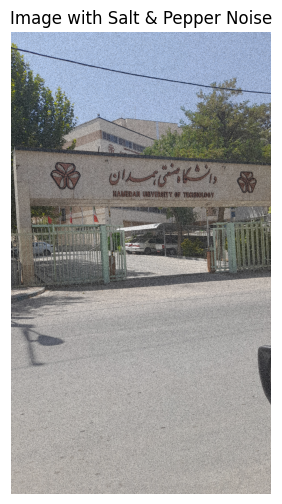

In [48]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = np.copy(image)
    salt_mask = np.random.random(image.shape[:2]) < salt_prob
    if len(image.shape) == 3:  
        noisy_image[salt_mask] = [255, 255, 255]
    else:  
        noisy_image[salt_mask] = 255
    
    pepper_mask = np.random.random(image.shape[:2]) < pepper_prob
    if len(image.shape) == 3:  
        noisy_image[pepper_mask] = [0, 0, 0]
    else:  
        noisy_image[pepper_mask] = 0
    
    return noisy_image


noisy_image = add_salt_pepper_noise(original_rgb, salt_prob=0.1, pepper_prob=0.1)

fig, ax10 = plt.subplots(figsize=(8, 6))  
ax10.imshow(noisy_image)
ax10.set_title('Image with Salt & Pepper Noise')
ax10.axis('off')
plt.show()

# 2.3 Image Kernel in Computer Vision

A kernel (also called a filter or mask) is a small matrix used in image processing for convolution operations.
It is applied to an image to extract features, enhance details, or modify certain properties like edges, blurring, or sharpening.

Applications of Kernels
- Smoothing / Blurring: Reduces noise using averaging or Gaussian kernels.
- Edge Detection: Detects edges using Sobel, Prewitt, or Laplacian kernels.
- Sharpening: Enhances edges and fine details with sharpening kernels.
- Embossing / Feature Enhancement: Highlights certain patterns in the image.

How a Kernel is Applied

- Place the kernel over the image so that the kernel center aligns with a pixel.
- Multiply each kernel value by the corresponding pixel value beneath it.
- Sum all the results to obtain the new pixel value at the center.
- Repeat for every pixel in the image (with padding if needed).

This process is called convolution, and the resulting image is called a filtered image.

---

<div dir="rtl">
کرنل در پردازش تصویر

کرنل (یا فیلتر / ماسک) یک ماتریس کوچک است که در پردازش تصویر برای عملیات کانولوشن (Convolution) استفاده می‌شود.
کرنل روی تصویر اعمال می‌شود تا ویژگی‌ها استخراج شوند، جزئیات بهبود یابند، یا خصوصیات خاصی مانند لبه‌ها، تاری یا شارپنس تغییر کنند.

کاربردهای کرنل
<ul> <li>هموارسازی / Blurring: کاهش نویز با استفاده از کرنل میانگین یا گوسی.</li> <li>تشخیص لبه (Edge Detection): شناسایی لبه‌ها با کرنل‌های Sobel، Prewitt یا Laplacian.</li> <li>شارپ کردن (Sharpening): افزایش وضوح لبه‌ها و جزئیات تصویر.</li> <li>Embossing / افزایش ویژگی‌ها: برجسته کردن الگوهای خاص در تصویر.</li> </ul>
نحوه اعمال کرنل
<ol> <li>کرنل روی تصویر قرار می‌گیرد تا مرکز کرنل با یک پیکسل تصویر هم‌تراز شود.</li> <li>هر مقدار کرنل در پیکسل متناظر خود ضرب می‌شود.</li> <li>تمام مقادیر ضرب شده جمع شده و مقدار جدید پیکسل مرکز را می‌دهد.</li> <li>این فرآیند برای همه پیکسل‌های تصویر تکرار می‌شود (در صورت نیاز با padding).</li> </ol>

این فرآیند به عنوان کانولوشن (Convolution) شناخته می‌شود و تصویر حاصل، تصویر فیلتر شده نام دارد.

# 2.4 
## Mean Filter
<div dir="ltr">

The mean filter (also known as the average filter) is one of the simplest smoothing filters used in image processing.
It works by replacing each pixel with the average value of the pixels inside a defined kernel window (e.g., 3×3, 5×5, 9×9).
This produces a blurred version of the original image and helps reduce random noise.

Kernel Type

The kernel for a mean filter contains equal weights, and all values are the same.

For example, a 3×3 mean filter kernel:

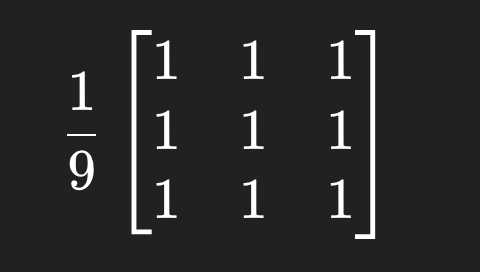

A 5×5 kernel:

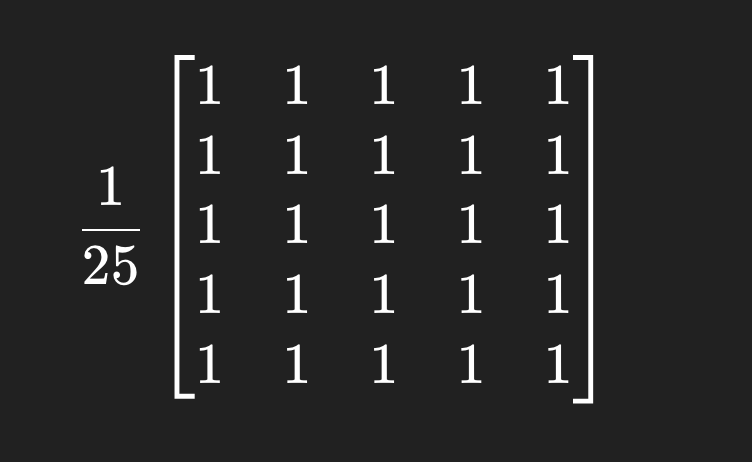

What It Does:
- Smooths the image
- Reduces low-level noise
- Blurs edges (not edge-preserving)
- Produces a uniform blur across the entire image

Important Note
The mean filter tends to blur details and edges, because all pixels contribute equally.
It is simple but not very effective for preserving structures in images.

</div>


---

<div dir="rtl">

<h3>فیلتر میانگین (Mean Filter)</h3>

فیلتر میانگین که با نام Average Filter نیز شناخته می‌شود، یکی از ساده‌ترین فیلترهای هموارسازی در پردازش تصویر است.  
در این روش، مقدار هر پیکسل با <b>میانگین پیکسل‌های موجود در یک پنجره (کرنل)</b> مانند ۳×۳، ۵×۵، یا ۹×۹ جایگزین می‌شود.  
نتیجه‌ی این فرآیند یک تصویر محوتر است که در آن نویز تصادفی کاهش می‌یابد.

<h4>نوع کرنل</h4>
کرنل فیلتر میانگین شامل وزن‌های برابر است؛ یعنی <b>تمام عناصر کرنل مقدار یکسان دارند</b>.

برای مثال، کرنل ۳×۳ و ۵×۵:

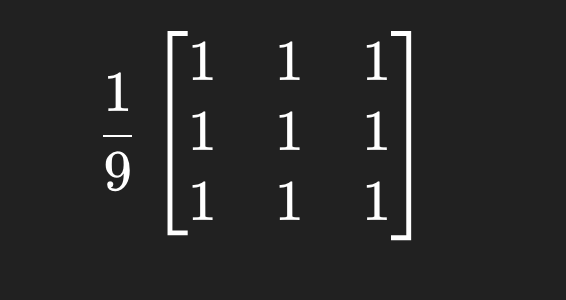

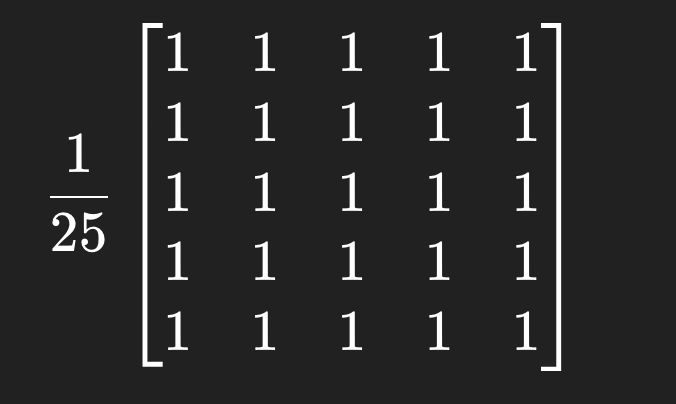

<h4>کاربردها و رفتار فیلتر میانگین</h4>

<ul>
  <li>هموارسازی تصویر</li>
  <li>کاهش نویز سطح پایین</li>
  <li>محو کردن لبه‌ها (لبه‌ها را حفظ نمی‌کند)</li>
  <li>ایجاد محوی یکنواخت در سراسر تصویر</li>
</ul>

<h4>نکته مهم</h4>

<ul>
  <li>فیلتر میانگین معمولاً باعث محو شدن جزئیات و لبه‌ها می‌شود، زیرا <b>همه پیکسل‌ها به طور برابر در میانگین‌گیری مشارکت دارند</b>.</li>
  <li>این فیلتر ساده است، اما برای حفظ ساختار و جزئیات تصویر مناسب نیست.</li>
</ul>

</div>
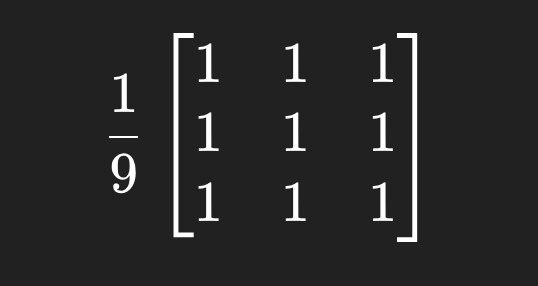
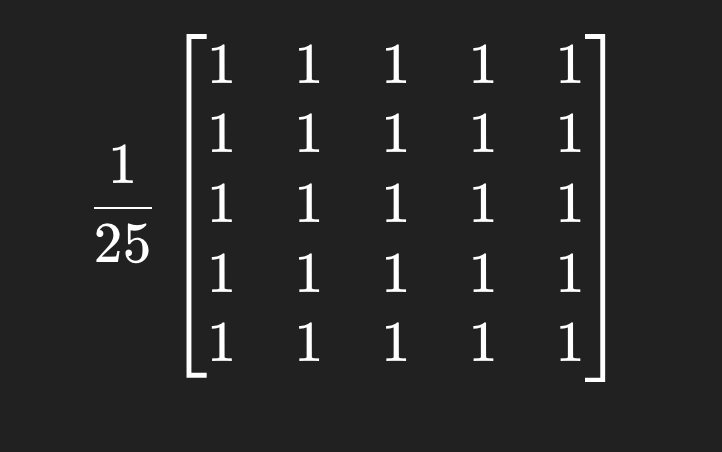

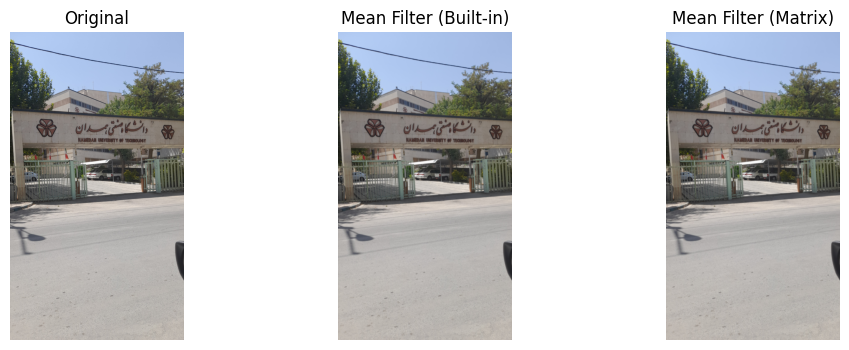

In [49]:
def mean_filter_builtin(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

def mean_filter_matrix(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)


mean_builtin = mean_filter_builtin(original_rgb, 9)
mean_matrix = mean_filter_matrix(original_rgb, 9)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_builtin, cmap='gray')
plt.title('Mean Filter (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_matrix, cmap='gray')
plt.title('Mean Filter (Matrix)')
plt.axis('off')
plt.show()

# 2.4
## Gaussian Filter

<div dir="ltr">

The Gaussian filter is a smoothing filter that reduces noise and detail using a weighted kernel based on the Gaussian (normal) distribution.  
Unlike the mean filter, which gives equal weight to all pixels, the Gaussian filter gives **higher weight to pixels near the center** and **lower weight to pixels farther away**.  
This produces more natural and edge-preserving smoothing.

Kernel Type

The kernel of a Gaussian filter is generated using the 2D Gaussian function.  
Weights are highest at the center and decrease gradually toward the edges.

Example of 3×3 Gaussian kernel (σ = 1):

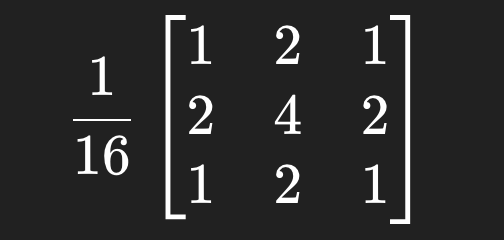

What It Does:
- Smooths the image more naturally than the mean filter  
- Reduces noise while preserving more edges  
- Produces less uniform blur compared to the mean filter  
- Ideal for preprocessing before edge detection (e.g., Canny)

Important Note  
The Gaussian filter reduces noise effectively but still blurs fine details.  
It is widely used because its weighting produces smooth transitions and minimizes artifacts.

</div>

---

<div dir="rtl">

<h3>فیلتر گوسی (Gaussian Filter)</h3>

فیلتر گوسی یکی از مهم‌ترین فیلترهای هموارسازی در پردازش تصویر است که برای کاهش نویز و محوسازی نرم استفاده می‌شود.  
بر خلاف فیلتر میانگین که به همه پیکسل‌ها وزن مساوی می‌دهد، فیلتر گوسی به <b>پیکسل‌های نزدیک مرکز وزن بیشتری</b> و به پیکسل‌های دورتر وزن کمتر می‌دهد.  
به همین دلیل نتیجه‌ی آن طبیعی‌تر بوده و لبه‌ها بهتر حفظ می‌شوند.

<h4>نوع کرنل</h4>

کرنل فیلتر گوسی با استفاده از تابع گوسی دو‌بعدی ساخته می‌شود.  
بیشترین مقدار در مرکز کرنل است و وزن‌ها به‌صورت تدریجی به سمت اطراف کاهش می‌یابند.

برای مثال، کرنل ۳×۳:

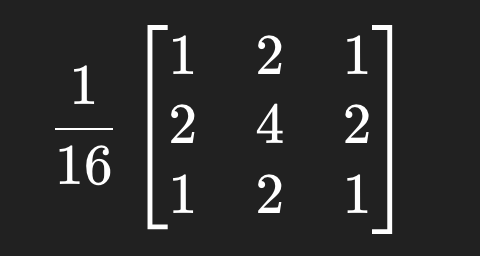

<h4>کاربردها و رفتار فیلتر گوسی</h4>

<ul>
  <li>هموارسازی نرم و طبیعی تصویر</li>
  <li>کاهش نویز همراه با حفظ بهتر لبه‌ها نسبت به فیلتر میانگین</li>
  <li>محو کردن جزئیات ریز بدون ایجاد محوی یکنواخت</li>
  <li>استفاده‌ی گسترده در پیش‌پردازش، خصوصاً قبل از آشکارسازی لبه‌ها (مثل Canny)</li>
</ul>

<h4>نکته مهم</h4>

<ul>
  <li>فیلتر گوسی نویز را مؤثرتر از فیلتر میانگین کاهش می‌دهد، اما همچنان مقداری از جزئیات را محو می‌کند.</li>
  <li>به دلیل رفتار طبیعی و وزن‌دهی مناسب، یکی از استانداردترین فیلترها در پردازش تصویر است.</li>
</ul>

</div>
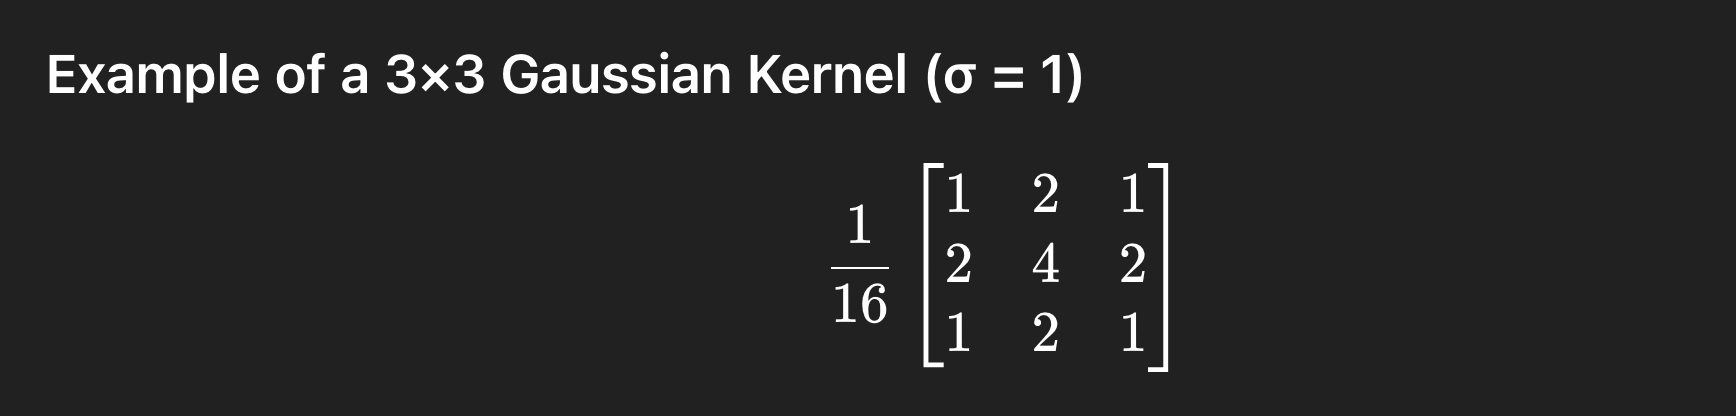

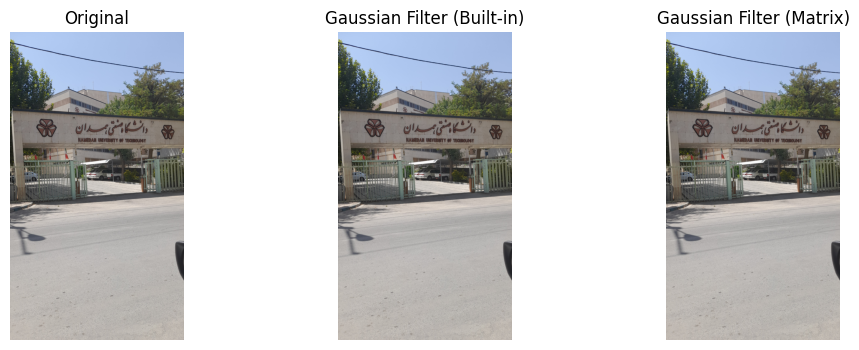

In [50]:
def gaussian_filter_builtin(image, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def gaussian_filter_matrix(image, kernel_size=5, sigma=1.0):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel = kernel / np.sum(kernel) 
    return cv2.filter2D(image, -1, kernel)


gaussian_builtin = gaussian_filter_builtin(original_rgb, 11, 1.0)
gaussian_matrix = gaussian_filter_matrix(original_rgb, 11, 1.0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_builtin, cmap='gray')
plt.title('Gaussian Filter (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_matrix, cmap='gray')
plt.title('Gaussian Filter (Matrix)')
plt.axis('off')
plt.show()

# 2.4
<div dir="ltr">

Median Filter

The median filter is a nonlinear smoothing filter commonly used to remove salt-and-pepper noise.  
Instead of averaging pixel values (like the mean filter), the median filter replaces each pixel with the **median** of the intensities in the surrounding kernel window (e.g., 3×3, 5×5, 7×7).  

Because the median is resistant to extreme values, this filter is highly effective for removing impulsive noise while preserving edges.

Kernel Type

The median filter does not use a fixed matrix of weights.  
Instead, it uses a **window** (kernel size) to collect pixel values, sorts them, and selects the median.

Example (3×3 window):

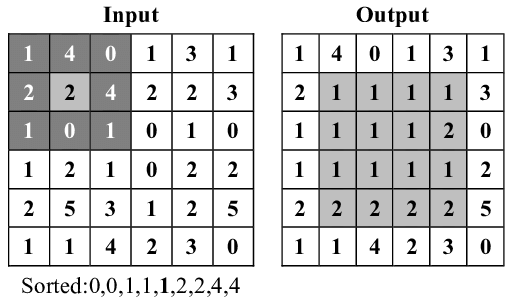

Values inside window → sort → pick the middle value  
This produces smoothing *without blurring edges as much as linear filters.*

What It Does:
- Removes salt-and-pepper noise extremely well  
- Preserves edges better than mean and Gaussian filters  
- Reduces small speckles and impulsive noise  
- Produces less blur compared to averaging filters  

Important Note  
The median filter is nonlinear, so it cannot be implemented using convolution.  
For large kernel sizes, it becomes computationally heavier because of sorting operations.

</div>

---

<div dir="rtl">

<h3>فیلتر میانه (Median Filter)</h3>

فیلتر میانه یک فیلتر غیرخطی برای هموارسازی تصویر است که به‌طور ویژه برای حذف نویز فلفل‌نمکی (Salt & Pepper) استفاده می‌شود.  
بر خلاف فیلتر میانگین یا گوسی که از میانگین یا وزن‌دهی استفاده می‌کنند، در فیلتر میانه مقدار هر پیکسل با <b>میانهٔ پیکسل‌های موجود در پنجرهٔ کرنل</b> (مثل ۳×۳، ۵×۵ یا ۷×۷) جایگزین می‌شود.  

به دلیل اینکه مقدار میانه در برابر مقادیر پرت مقاوم است، این فیلتر برای حذف نویز ضربه‌ای بسیار مؤثر است و لبه‌ها را نیز بهتر حفظ می‌کند.

<h4>نوع کرنل</h4>

فیلتر میانه مانند فیلترهای میانگین و گوسی **کرنل وزن‌دار ثابت ندارد**.  
در عوض، تنها از یک پنجره (مثلاً ۳×۳) برای جمع‌آوری پیکسل‌های اطراف استفاده می‌شود، سپس:
<ul>
  <li>مقادیر پیکسل‌ها مرتب می‌شوند،</li>
  <li>و میانهٔ آنها انتخاب می‌شود.</li>
</ul>

این فرآیند باعث هموارسازی بدون محوشدگی شدید لبه‌ها می‌شود.

<h4>کاربردها و رفتار فیلتر میانه</h4>

<ul>
  <li>حذف بسیار مؤثر نویز فلفل‌نمکی</li>
  <li>حفظ بهتر لبه‌ها در مقایسه با فیلترهای میانگین و گوسی</li>
  <li>کاهش نقاط نویزی کوچک (Speckles)</li>
  <li>ایجاد محوی کمتر نسبت به فیلترهای خطی</li>
</ul>

<h4>نکته مهم</h4>

<ul>
  <li>فیلتر میانه یک فیلتر غیرخطی است و قابل پیاده‌سازی با کانولوشن معمولی نیست.</li>
  <li>برای کرنل‌های بزرگ، هزینه محاسباتی افزایش می‌یابد چون نیاز به مرتب‌سازی وجود دارد.</li>
</ul>

</div>

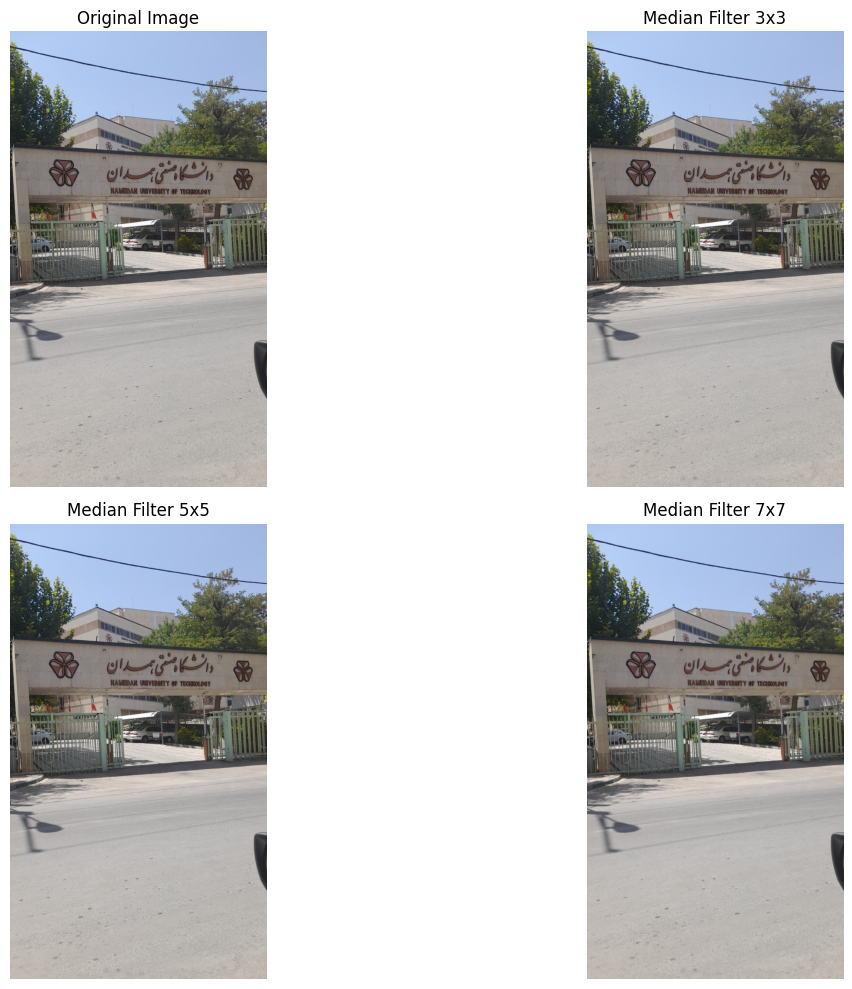

In [51]:
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

filtered_3x3 = apply_median_filter(original_rgb, 3)
filtered_5x5 = apply_median_filter(original_rgb, 5)
filtered_7x7 = apply_median_filter(original_rgb, 7)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(filtered_3x3)
plt.title('Median Filter 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_5x5)
plt.title('Median Filter 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_7x7)
plt.title('Median Filter 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()

# 2.5 Best filter for removing noises
<div dir="ltr"> <h3>Why Median Filter Is the Best for Salt-and-Pepper Noise?</h3>

Salt-and-pepper noise appears as random black (0) and white (255) pixels in an image.
The median filter is considered the best filter for removing this type of noise because it replaces each pixel with the median value inside a kernel window instead of the average.

Since the median picks the middle value, extreme outliers like black and white noise pixels get removed naturally.

<h4>How the Median Filter Removes Salt-and-Pepper Noise</h4>

In a 3×3 neighborhood, even if one or two pixels are extremely bright (255) or dark (0), they do not affect the median.

The filter selects the central tendency value, which usually matches the real image content.

This makes the median filter more robust than mean or Gaussian filtering.

<h4>Why Median is Better than Other Filters</h4> <ul> <li><b>Mean filter</b> averages values → blurred output, noise still remains</li> <li><b>Gaussian filter</b> smooths based on weighted averaging → does not remove isolated outliers</li> <li><b>Median filter</b> removes outliers completely → preserves edges</li> </ul> <h4>Final Result</h4>

Best filter for salt-and-pepper noise

Removes noise efficiently

Preserves edges better than smoothing filters

Works well even on strong noise levels

</div>
<div dir="rtl"> <h3>چرا فیلتر میانه (Median) بهترین گزینه برای حذف نویز نمکی-فلفلی است؟</h3>

نویز نمکی-فلفلی به صورت پیکسل‌های تصادفی کاملاً سفید (۲۵۵) یا کاملاً سیاه (۰) در تصویر ظاهر می‌شود.
فیلتر میانه بهترین فیلتر برای حذف این نوع نویز است، زیرا هر پیکسل را با <b>مقدار میانه</b> در پنجرهٔ کرنل جایگزین می‌کند، نه با میانگین.

از آنجایی که میانه مقدار «وسط» را انتخاب می‌کند، پیکسل‌های خیلی کوچک (۰) یا خیلی بزرگ (۲۵۵) که همان نویز هستند، به طور طبیعی حذف می‌شوند.

<h4>نحوه‌ی عملکرد فیلتر میانه در حذف نویز</h4> <ul> <li>در یک ناحیهٔ ۳×۳، حتی اگر چند پیکسل کاملاً سفید یا کاملاً سیاه باشند، روی مقدار میانه تأثیر نمی‌گذارند.</li> <li>این فیلتر مقدار مرکزی را انتخاب می‌کند که معمولاً متعلق به محتوای واقعی تصویر است.</li> <li>به همین دلیل نسبت به فیلتر میانگین یا گوسی مقاوم‌تر است.</li> </ul> <h4>چرا فیلتر میانه بهتر از سایر فیلترهاست؟</h4> <ul> <li><b>میانگین (Mean):</b> میانگین‌گیری می‌کند → تصویر محو می‌شود، نویز باقی می‌ماند</li> <li><b>گوسی (Gaussian):</b> میانگین‌گیری وزن‌دار → پیکسل‌های ناگهانی را حذف نمی‌کند</li> <li><b>میانه (Median):</b> مقدار وسط را انتخاب می‌کند → پیکسل‌های نویزی کاملاً حذف می‌شوند</li> </ul> <h4>نتیجه‌گیری</h4> <ul> <li>بهترین فیلتر برای حذف نویز نمکی-فلفلی</li> <li>حذف کامل نویز بدون محو شدن زیاد تصویر</li> <li>حفظ بهتر لبه‌ها نسبت به فیلترهای هموارساز</li> <li>کارایی بالا حتی در نویز شدید</li> </ul> </div>

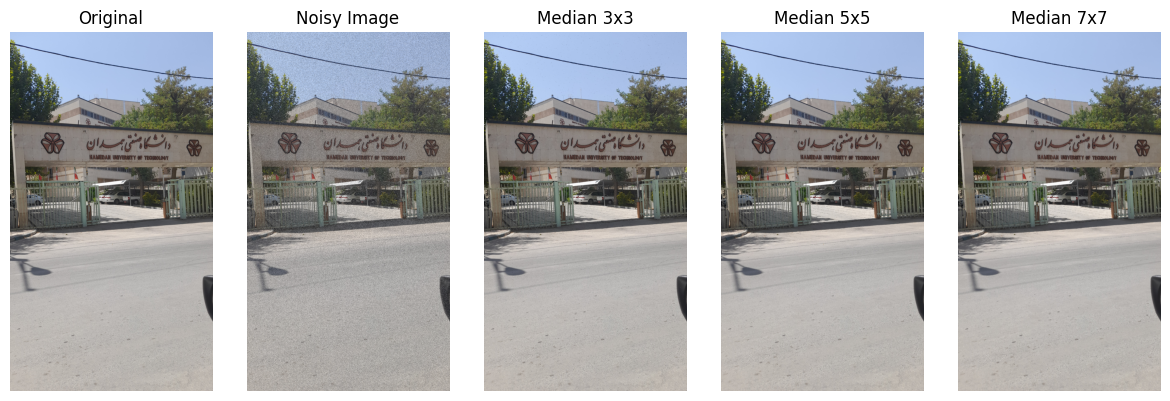

In [24]:
import cv2
import matplotlib.pyplot as plt

# Add salt and pepper noise
noisy = add_salt_pepper_noise(original_rgb, salt_prob=0.1, pepper_prob=0.1)

# Apply median filters with different kernel sizes
median_filters = [
    ('Median 3x3', cv2.medianBlur(noisy, 3)),
    ('Median 5x5', cv2.medianBlur(noisy, 5)),
    ('Median 7x7', cv2.medianBlur(noisy, 7))
]

# Plot original, noisy, and filtered images
plt.figure(figsize=(12, 4))

plt.subplot(1, 5, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

for i, (title, filtered_img) in enumerate(median_filters, 3):
    plt.subplot(1, 5, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


# 2.6
<div dir="ltr"> <h3>Sobel Filter</h3>

The Sobel filter is an edge-detection operator that highlights horizontal and vertical edges.
It works by convolving the image with two kernels: one for horizontal changes (Sobel X) and one for vertical changes (Sobel Y).

Example Sobel Kernels

Horizontal (X):
``` python
[-1  0  1]
[-2  0  2]
[-1  0  1]
```

Vertical (Y):
``` python
[-1 -2 -1]
[ 0  0  0]
[ 1  2  1]
```
What It Does:

- Detects edges in horizontal and vertical directions
- Enhances object boundaries
- Useful for gradient magnitude and direction

Important Note:
More robust to noise than simple gradient operators due to inherent smoothing.

</div>

---

<div dir="rtl"> <h3>فیلتر سوبل (Sobel Filter)</h3>

فیلتر سوبل یک اپراتور تشخیص لبه است که لبه‌های افقی و عمودی را برجسته می‌کند.
این فیلتر با دو کرنل ۳×۳ اعمال می‌شود: یکی برای تغییرات افقی (Sobel X) و دیگری برای تغییرات عمودی (Sobel Y).

<h4>نمونه کرنل‌های سوبل</h4>

افقی (X):
``` python
[-1  0  1]
[-2  0  2]
[-1  0  1]
```

افقی (X):
``` python
[-1 -2 -1]
[ 0  0  0]
[ 1  2  1]
```
<h4>کاربردها</h4> <ul> <li>تشخیص لبه‌های افقی و عمودی</li> <li>برجسته‌سازی مرز اشیاء</li> <li>محاسبه گرادیان و جهت آن</li> </ul> <h4>نکته مهم</h4> <ul> <li>به دلیل ترکیب مشتق‌گیری و هموارسازی، نسبت به نویز مقاوم‌تر از فیلترهای گرادیان ساده است.</li> </ul> </div>

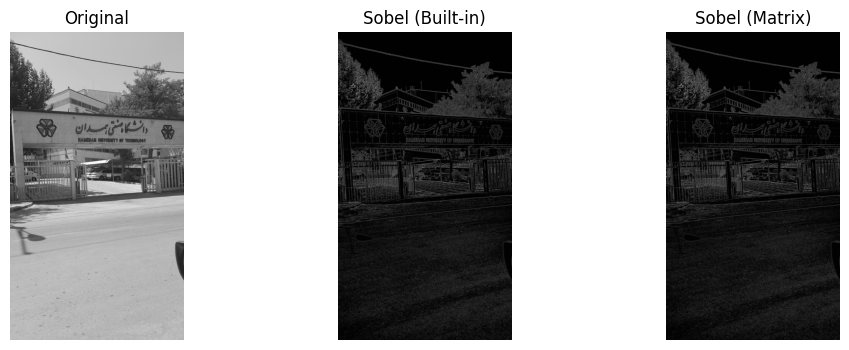

In [26]:
def sobel_builtin(image, direction='both'):
    if direction == 'x':
        return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    elif direction == 'y':
        return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    else:  
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        return np.sqrt(sobel_x**2 + sobel_y**2)

def sobel_matrix_manual(image, direction='both'):
    sobel_x_kernel = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]], dtype=np.float32)
    
    sobel_y_kernel = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]], dtype=np.float32)
    
    if direction == 'x':
        return cv2.filter2D(image.astype(np.float32), -1, sobel_x_kernel)
    elif direction == 'y':
        return cv2.filter2D(image.astype(np.float32), -1, sobel_y_kernel)
    else:  
        grad_x = cv2.filter2D(image.astype(np.float32), -1, sobel_x_kernel)
        grad_y = cv2.filter2D(image.astype(np.float32), -1, sobel_y_kernel)
        return np.sqrt(grad_x**2 + grad_y**2)


sobel_builtin_result = sobel_builtin(gray_image, 'both')
sobel_matrix_result = sobel_matrix_manual(gray_image, 'both')

sobel_builtin_norm = cv2.normalize(sobel_builtin_result, None, 0, 255, cv2.NORM_MINMAX)
sobel_matrix_norm = cv2.normalize(sobel_matrix_result, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_builtin_norm, cmap='gray')
plt.title('Sobel (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_matrix_norm, cmap='gray')
plt.title('Sobel (Matrix)')
plt.axis('off')
plt.show()

<div dir="ltr"> <h3>Laplacian Filter</h3>

The Laplacian filter is a second-order derivative operator that detects rapid intensity changes in all directions.
It highlights edges and fine details.

Example Laplacian Kernels

4 neighbor:
``` python
[ 0 -1  0]
[-1  4 -1]
[ 0 -1  0]
```
8-neighbor:
``` python
[-1 -1 -1]
[-1  8 -1]
[-1 -1 -1]
```
What It Does:

- Detects edges in all directions
- Enhances fine details
- Often combined with Gaussian to reduce noise

Important Note:
Highly sensitive to noise; usually Gaussian smoothing is applied before.

</div>

---

<div dir="rtl"> <h3>فیلتر لاپلاسین (Laplacian Filter)</h3>

فیلتر لاپلاسین یک اپراتور مشتق مرتبه دوم است که تغییرات شدید شدت روشنایی را در تمام جهات تشخیص می‌دهد.
این فیلتر لبه‌ها و جزئیات ریز را برجسته می‌کند.

<h4>نمونه کرنل‌های لاپلاسین</h4>

4-همسایه:
``` python
[ 0 -1  0]
[-1  4 -1]
[ 0 -1  0]
```

8-همسایه:
``` python
[-1 -1 -1]
[-1  8 -1]
[-1 -1 -1]
```

<h4>کاربردها</h4> <ul> <li>تشخیص لبه‌ها در تمام جهات</li> <li>برجسته‌سازی جزئیات ریز</li> <li>تشخیص تغییرات شدید شدت روشنایی</li> </ul> <h4>نکته مهم</h4> <ul> <li>این فیلتر نسبت به نویز حساس است؛ معمولاً قبل از آن فیلتر گوسی اعمال می‌شود.</li> </ul> </div>

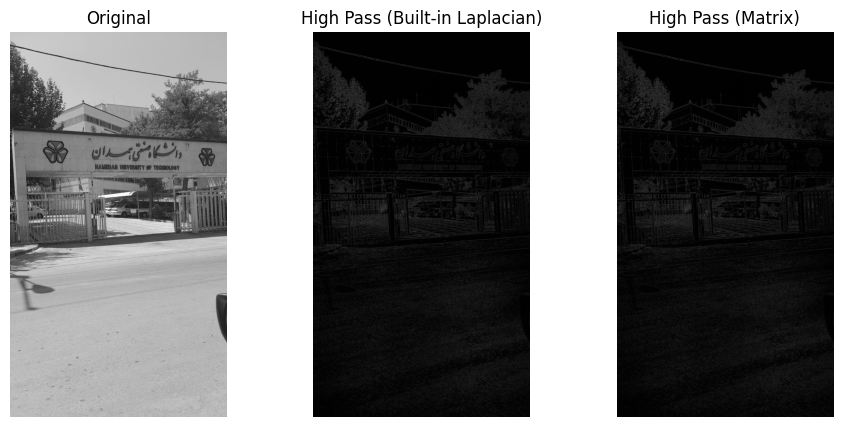

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_builtin(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def laplacian_matrix_manual(image):
    laplacian_kernel = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]], dtype=np.float32)
    
    # laplacian_kernel = np.array([[-1, -1, -1],
    #                              [-1, 8, -1],
    #                              [-1, -1, -1]], dtype=np.float32)
    
    return cv2.filter2D(image.astype(np.float32), -1, laplacian_kernel)


laplacian_builtin_result = laplacian_builtin(gray_image)
highpass_matrix_result = laplacian_matrix_manual(gray_image)

laplacian_builtin_norm = cv2.normalize(np.abs(laplacian_builtin_result), None, 0, 255, cv2.NORM_MINMAX)
highpass_matrix_norm = cv2.normalize(np.abs(highpass_matrix_result), None, 0, 255, cv2.NORM_MINMAX)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(laplacian_builtin_norm, cmap='gray')
plt.title('High Pass (Built-in Laplacian)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(highpass_matrix_norm, cmap='gray')
plt.title('High Pass (Matrix)')
plt.axis('off')

plt.show()

<div dir="ltr"> <h3>Canny Edge Detector</h3>

Canny is a multi-stage edge detection algorithm designed to detect strong and thin edges while reducing noise.

Steps:
- Apply Gaussian blur to reduce noise
- Compute gradients (Sobel X and Y)
- Find edge magnitude and direction
- Apply non-maximum suppression to thin edges
- Use double thresholding and edge tracking by hysteresis

What It Does:
- Detects clear and thin edges
- Reduces noise and avoids false edges
- Produces clean edge maps suitable for segmentation

Important Note:
Canny does not use a fixed kernel for the final detection — it relies on gradients and thresholding.

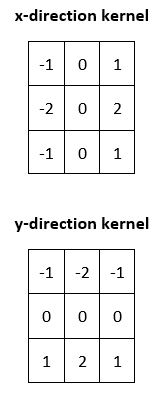
</div>

<div dir="rtl"> <h3>فیلتر کنی (Canny Edge Detector)</h3>

کنی یک الگوریتم چندمرحله‌ای برای تشخیص لبه است که لبه‌های واضح و باریک را در حالی که نویز کاهش می‌یابد، شناسایی می‌کند.

<h4>مراحل:</h4> <ul> <li>اعمال فیلتر گوسی برای کاهش نویز</li> <li>محاسبه گرادیان‌ها (Sobel X و Y)</li> <li>محاسبه اندازه و جهت لبه</li> <li>اعمال Non-Maximum Suppression برای باریک کردن لبه‌ها</li> <li>استفاده از Double Threshold و Hysteresis برای تشخیص نهایی</li> </ul> <h4>کاربردها</h4> <ul> <li>تشخیص لبه‌های واضح و باریک</li> <li>کاهش نویز و جلوگیری از لبه‌های اشتباه</li> <li>ایجاد نقشه لبه تمیز مناسب برای بخش‌بندی تصویر</li> </ul> <h4>نکته مهم</h4> <ul> <li>کنی از کرنل ثابت برای تشخیص نهایی استفاده نمی‌کند، بلکه بر اساس گرادیان و آستانه‌گذاری عمل می‌کند.</li> </ul> </div>

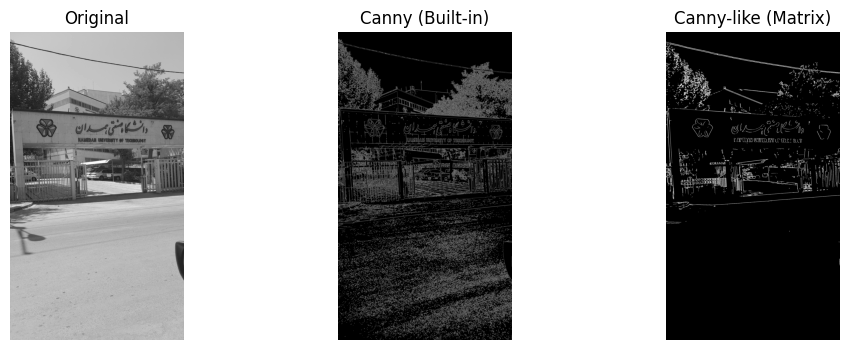

In [28]:
def canny_builtin(image, threshold1=100, threshold2=200):
    return cv2.Canny(image, threshold1, threshold2)

def canny_matrix_manual(image, low_threshold=100, high_threshold=200):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * 180 / np.pi
    edges = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            if magnitude[i, j] > high_threshold:
                edges[i, j] = 255
            elif magnitude[i, j] > low_threshold:
                if np.any(edges[i-1:i+2, j-1:j+2] == 255):
                    edges[i, j] = 255
    
    return edges.astype(np.uint8)


canny_builtin = canny_builtin(gray_image)
canny_matrix = canny_matrix_manual(gray_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(canny_builtin, cmap='gray')
plt.title('Canny (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_matrix, cmap='gray')
plt.title('Canny-like (Matrix)')
plt.axis('off')
plt.show()

# 3

In [32]:
def quick_process_video(input_video_path, output_video_path, salt_prob=0.02, pepper_prob=0.02):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {input_video_path}")
        return False
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Input Video: {total_frames} frames, {fps} FPS, {width}x{height}")
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    frame_count = 0
    print("Processing video frames...")
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        noisy_frame = add_salt_pepper_noise(frame, salt_prob, pepper_prob)
        
        out.write(noisy_frame)
        
        frame_count += 1
        
        if frame_count % 100 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")
    
    cap.release()
    out.release()
    
    print(f"Processing complete!")
    print(f"Output video: {output_video_path}")
    print(f"Total frames processed: {frame_count}")
    return True


input_vid = "/kaggle/input/pic-and-video/Original_Vid.mp4"  
output_vid = "Noisy_Vid.mp4"
quick_process_video(input_vid, output_vid, salt_prob=0.05, pepper_prob=0.05)

Input Video: 545 frames, 30.0 FPS, 640x360
Processing video frames...
Processed 100/545 frames...
Processed 200/545 frames...
Processed 300/545 frames...
Processed 400/545 frames...
Processed 500/545 frames...
Processing complete!
Output video: Noisy_Vid.mp4
Total frames processed: 545


True